In [441]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, model_selection
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB    
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [498]:
df = pd.read_excel('Train_dataset.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'Diuresis_TS.xlsx'

In [443]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0}).astype(int)
df.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,0,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,0,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,0,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,0,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,0,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [444]:
df.drop(['Designation','Name','Married','Region','Insurance','salary'],axis=1,inplace=True)

In [445]:
df.dropna(axis=0,inplace=True)
df['Occupation'].unique()

array(['Farmer', 'Cleaner', 'Driver', 'Manufacturing', 'Clerk',
       'Business', 'Sales', 'Researcher', 'Legal'], dtype=object)

In [446]:
df['Occupation'] = df['Occupation'].map({'Farmer':0, 'Cleaner':1, 'Driver':3, 'Manufacturing':2, 'Clerk':7,
       'Business':5, 'Sales':6, 'Researcher':4, 'Legal':8}).astype(int)

In [447]:
df['Mode_transport'].unique()

array(['Public', 'Car', 'Walk'], dtype=object)

In [448]:
df['Mode_transport'] = df['Mode_transport'].map({'Public':0,'Walk':1,'Car':2}).astype(int)

In [449]:
df['comorbidity'].unique()

array(['Hypertension', 'None', 'Coronary Heart Disease', 'Diabetes'],
      dtype=object)

In [450]:
df['comorbidity'] = df['comorbidity'].map({'Hypertension':1, 
                                           'None':0, 'Coronary Heart Disease':2, 'Diabetes':3}).astype(int)

In [451]:
df['Pulmonary score'].unique()

array(['<400', '<300', '<200', '<100'], dtype=object)

In [452]:
df['Pulmonary score'] = df['Pulmonary score'].map({'<400':0, '<300':1, '<200':2, '<100':3}).astype(int)

In [453]:
df['cardiological pressure'] = df[['cardiological pressure']].convert_objects(convert_numeric=True).fillna(0)

C:\Users\Pritish Dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [454]:
df['cardiological pressure'].unique()

array(['Normal', 'Elevated', 'Stage-01', 'Stage-02'], dtype=object)

In [455]:
df['cardiological pressure'] = df['cardiological pressure'].map({'Normal':0, 'Elevated':1, 'Stage-01':2, 'Stage-02':3}).astype(int)

In [456]:
df['Infect_Level'] = np.zeros(len(df.Infect_Prob))

In [457]:
def infect(x):
    if (x > 0 and x <=20):
        return 0
    elif (x > 20 and x <=40):
        return 1
    elif (x > 40 and x <=60):
        return 2
    elif (x > 60 and x <=80):
        return 3
    else:
        return 4

df['Infect_Level'] = df['Infect_Prob'].apply(infect)

In [458]:
df.head(10)

,people_ID,Gender,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob,Infect_Level
0,1,0,1.0,0,0,2,0,1,68,8,...,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010,2
2,3,0,1.0,1,0,2,0,0,19,13,...,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000,3
3,4,0,1.0,3,2,2,0,2,33,9,...,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225,2
4,5,0,2.0,2,2,2,0,3,23,7,...,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800,4
5,6,0,1.0,7,0,2,0,0,35,9,...,139.0,86.0,216.0,94.0,38.0,5,5,2.0,49.518345,2
7,8,0,1.0,2,0,2,0,3,49,10,...,123.0,179.0,242.0,82.0,59.0,34,3,0.0,49.121025,2
9,10,0,1.0,0,0,2,0,0,41,14,...,23.0,178.0,277.0,83.0,58.0,28,4,2.0,48.475097,2
10,11,0,1.0,2,0,2,0,0,43,9,...,32.0,24.0,203.0,62.0,51.0,31,4,0.0,46.970339,2
11,12,0,0.0,3,2,2,0,2,52,5,...,30.0,66.0,224.0,54.0,68.0,14,5,0.0,45.494822,2
13,14,0,2.0,5,0,2,0,1,52,14,...,17.0,48.0,333.0,99.0,51.0,31,5,2.0,48.948107,2


In [459]:
df['Infect_Level'].unique()

array([2, 3, 4, 1], dtype=int64)

In [460]:
Xtrain = df[['Gender','Children','Occupation','Mode_transport','cases/1M','Deaths/1M','comorbidity','Age','Coma score','Pulmonary score','cardiological pressure','Diuresis','Platelets','HBB','d-dimer','Heart rate','HDL cholesterol','Charlson Index','Blood Glucose','FT/month']]


In [461]:
df2 = pd.read_excel("Test_dataset.xlsx")

In [462]:
df2['Gender'] = df2['Gender'].map({'Male':1,'Female':0}).astype(int)
df2.drop(['Designation','Name','Married','Region','Insurance','salary'],axis=1,inplace=True)
df2.dropna(axis=0,inplace=True)
df2['Occupation'] = df2['Occupation'].map({'Farmer':0, 'Cleaner':1, 'Driver':3, 'Manufacturing':2, 'Clerk':7,
       'Business':5, 'Sales':6, 'Researcher':4, 'Legal':8}).astype(int)
df2['Mode_transport'] = df2['Mode_transport'].map({'Public':0,'Walk':1,'Car':2}).astype(int)
df2['comorbidity'] = df2['comorbidity'].map({'Hypertension':1, 
                                           'None':0, 'Coronary Heart Disease':2, 'Diabetes':3}).astype(int)
df2['Pulmonary score'] = df2['Pulmonary score'].map({'<400':0, '<300':1, '<200':2, '<100':3}).astype(int)
df2['cardiological pressure'] = df2['cardiological pressure'].map({'Normal':0, 'Elevated':1, 'Stage-01':2, 'Stage-02':3}).astype(int)

In [463]:
Xtest = df2[['Gender','Children','Occupation','Mode_transport','cases/1M','Deaths/1M','comorbidity','Age','Coma score','Pulmonary score','cardiological pressure','Diuresis','Platelets','HBB','d-dimer','Heart rate','HDL cholesterol','Charlson Index','Blood Glucose','FT/month']]


In [464]:
ytrain = df[['Infect_Prob']]
X_train,X_test,Y_train, Y_test = train_test_split(Xtrain, ytrain,test_size=0.2)

In [465]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(5641, 20) (1411, 20) (5641, 1) (1411, 1)


In [466]:
lreg = LinearRegression()

lreg.fit(X_train,Y_train)

x_pred = lreg.predict(X_train)
y_pred = lreg.predict(X_test)
y_predicted= lreg.predict(Xtest)

In [469]:
#THE FINAL OUTPUT
Infect_df = DataFrame(df2.people_ID)
Infect_df.columns = ['people_ID']

Infect_df['Infect_Predictions'] = pd.DataFrame(y_predicted)

Infect_df

,people_ID,Infect_Predictions
0,5942,53.045668
1,18664,53.205792
2,5603,55.837911
3,5649,57.697740
4,5099,53.145235
5,18749,56.411370
6,5228,50.093155
7,5559,52.614567
8,5220,58.055288
9,5476,52.044602


In [470]:
#Verification and Accuracy
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - x_pred) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - y_pred) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 99.52
Fit a model X_train, and calculate MSE with X_test and Y_test: 88.37


Text(0.5, 1.0, 'Residual Plots')

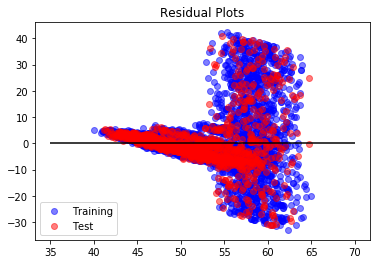

In [471]:
'''
From the residual plot we can observe that the values are divided equally above and below the Y=0 line
which means that choosing the linear regression model for class label was a smart choice. 
'''
train = plt.scatter(x_pred,(Y_train-x_pred),c='b',alpha=0.5)
test = plt.scatter(y_pred,(Y_test-y_pred),c='r',alpha=0.5)

plt.hlines(y=0,xmin=35,xmax=70)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

In [476]:
'''
Now let us test the Infection level COVID-19 with other classifier algorithms.
As done above, there are 5 levels of infection (0-4), which depends on Infect_Prob values.
The probablity has been equally divided into 5 levels for the sake of classification.
'''
ytrain = df[['Infect_Level']]
X_train,X_test,Y_train, Y_test = train_test_split(Xtrain, ytrain,test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(5641, 20) (1411, 20) (5641, 1) (1411, 1)


In [480]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,Y_train.values.ravel())

y_pred = logreg.predict(X_test)
y_predicted=logreg.predict(Xtest)


C:\Users\Pritish Dash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pritish Dash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [481]:
Infect_df = DataFrame(df2.people_ID)
Infect_df.columns = ['people_ID']

Infect_df['Infect_Predictions'] = pd.DataFrame(y_predicted)

Infect_df

,people_ID,Infect_Predictions
0,5942,2
1,18664,2
2,5603,2
3,5649,2
4,5099,2
5,18749,2
6,5228,2
7,5559,2
8,5220,2
9,5476,2


In [482]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8433734939759037


In [486]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
# Train the model using the training sets6
model.fit(X_train,Y_train.values.ravel())
y_predicted = model.predict(Xtest)
y_pred = model.predict(X_test)

In [487]:
Infect_df = DataFrame(df2.people_ID)
Infect_df.columns = ['people_ID']

Infect_df['Infect_Predictions'] = pd.DataFrame(y_predicted)

Infect_df

,people_ID,Infect_Predictions
0,5942,2
1,18664,2
2,5603,2
3,5649,2
4,5099,2
5,18749,2
6,5228,2
7,5559,2
8,5220,3
9,5476,2


In [488]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8192771084337349


In [495]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(X_train,Y_train.values.ravel())

#Predict the response for test dataset
y_predicted = knn.predict(Xtest)
y_pred = knn.predict(X_test)

In [496]:
Infect_df = DataFrame(df2.people_ID)
Infect_df.columns = ['people_ID']

Infect_df['Infect_Predictions'] = pd.DataFrame(y_predicted)

Infect_df

,people_ID,Infect_Predictions
0,5942,2
1,18664,2
2,5603,2
3,5649,1
4,5099,2
5,18749,2
6,5228,2
7,5559,2
8,5220,3
9,5476,2


In [497]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8192771084337349
